In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast


file_path = '/data/data.csv'
df = pd.read_csv(file_path)

In [2]:
def extract_from_dict_column(column, key):
    return column.apply(lambda x: ast.literal_eval(x)['args'].get(key) if pd.notnull(x) else None)

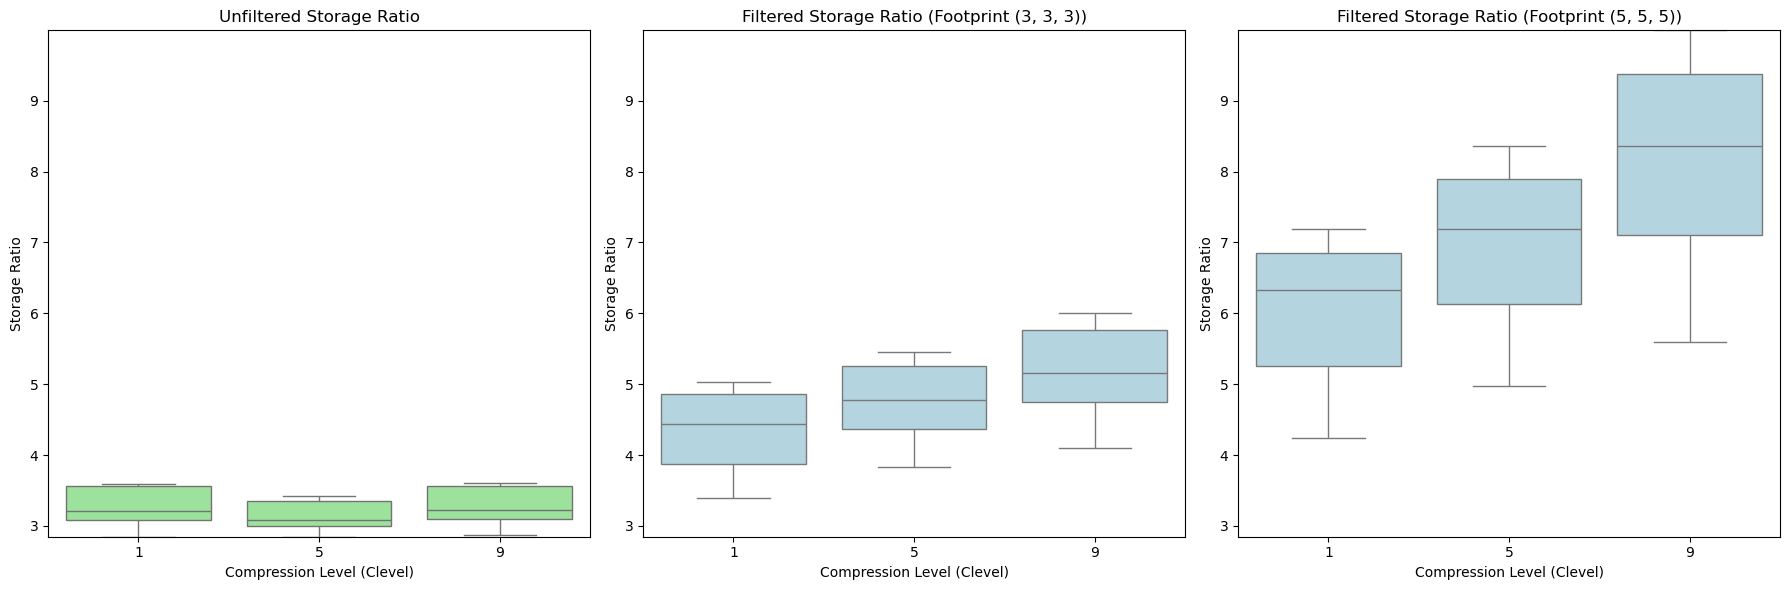

In [3]:
df['clevel'] = df['codec_params'].apply(lambda x: ast.literal_eval(x)['clevel'])
df['footprint'] = extract_from_dict_column(df['filter_params'], 'footprint')

# Convert footprint to string for plotting
df['footprint_str'] = df['footprint'].astype(str)

# Set the same y-axis range for all subplots (unfiltered and filtered)
y_min = min(df['filtered_storage_ratio'].min(), df['unfiltered_storage_ratio'].min())
y_max = max(df['filtered_storage_ratio'].max(), df['unfiltered_storage_ratio'].max())

# Set up the plotting environment for three side-by-side plots
plt.figure(figsize=(18, 6))

unique_footprints = df['footprint_str'].unique()

# 1. Unfiltered storage ratios plot
plt.subplot(1, 3, 1)
sns.boxplot(x='clevel', y='unfiltered_storage_ratio', data=df, color='lightgreen')
plt.title('Unfiltered Storage Ratio')
plt.ylabel('Storage Ratio')
plt.xlabel('Compression Level (Clevel)')
plt.ylim(y_min, y_max)

# 2. Filtered storage ratios for footprint 1
plt.subplot(1, 3, 2)
sns.boxplot(x='clevel', y='filtered_storage_ratio', data=df[df['footprint_str'] == unique_footprints[0]], color='lightblue')
plt.title(f'Filtered Storage Ratio (Footprint {unique_footprints[0]})')
plt.ylabel('Storage Ratio')
plt.xlabel('Compression Level (Clevel)')
plt.ylim(y_min, y_max)

# 3. Filtered storage ratios for footprint 2 (if exists)
if len(unique_footprints) > 1:
    plt.subplot(1, 3, 3)
    sns.boxplot(x='clevel', y='filtered_storage_ratio', data=df[df['footprint_str'] == unique_footprints[1]], color='lightblue')
    plt.title(f'Filtered Storage Ratio (Footprint {unique_footprints[1]})')
    plt.ylabel('Storage Ratio')
    plt.xlabel('Compression Level (Clevel)')
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

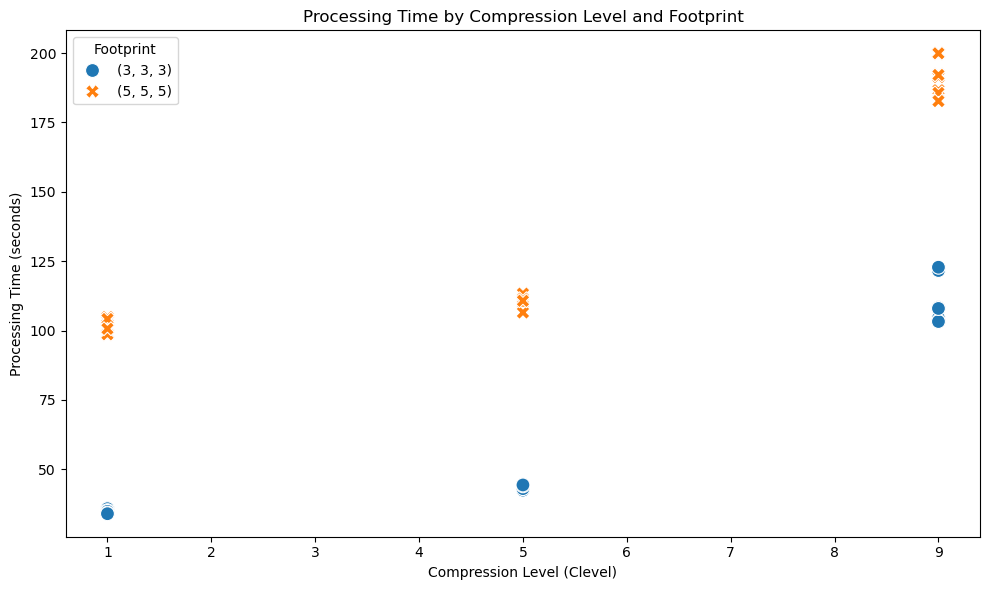

In [4]:
plt.figure(figsize=(10, 6))

# Scatter plot to show the relationship between clevel, footprint, and processing time
sns.scatterplot(x='clevel', y='process_time', hue='footprint_str', data=df, style='footprint_str', s=100)

plt.title('Processing Time by Compression Level and Footprint')
plt.ylabel('Processing Time (seconds)')
plt.xlabel('Compression Level (Clevel)')
plt.legend(title='Footprint')

plt.tight_layout()
plt.show()

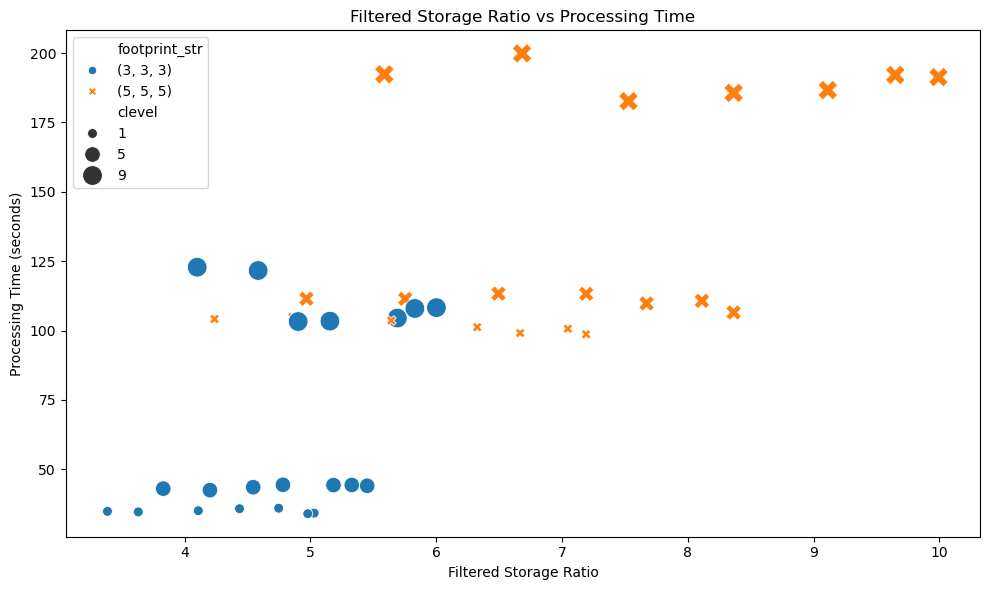

In [5]:
plt.figure(figsize=(10, 6))

# Create the scatter plot using size to reflect clevel and style to reflect footprint
sns.scatterplot(x='filtered_storage_ratio', y='process_time', hue='footprint_str', style='footprint_str', 
                size='clevel', data=df, sizes=(50, 200))

plt.title('Filtered Storage Ratio vs Processing Time')
plt.xlabel('Filtered Storage Ratio')
plt.ylabel('Processing Time (seconds)')
plt.legend(title=None)

plt.tight_layout()
plt.show()